In [2]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
from pyseus import basic_processing as ip

In [3]:
deep = pd.read_csv('../data/20210821_deep_HEK/proteinGroups.txt', sep='\t')

In [5]:
root = '../data/20210821_deep_HEK/'
analysis = '20210808'

pg_file = 'proteinGroups.txt'

# Use LFQ or absolute intensity
intensity_type = 'Intensity'

In [6]:
deep = ip.RawTables(root, analysis, intensity_type)

In [7]:
deep.filter_table()

Filtered 1190 of 12512 rows. Now 11322 rows.


In [8]:
filtered = deep.filtered_table

In [12]:
deep.filtered_table = filtered.drop(columns='Intensity')

In [14]:
deep.transform_intensities()

In [16]:
okay = deep.transformed_table

In [18]:
okay.head()

,Protein IDs,Majority protein IDs,Protein names,Gene names,Intensity HEK_1,Intensity HEK_2,Intensity HEK_3
0,A0A024RBG1;Q9NZJ9-2;Q9NZJ9-3,A0A024RBG1;Q9NZJ9-2;Q9NZJ9-3,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4,28.723545,28.350349,28.181772
2,A0A096LP01,A0A096LP01,NaN,LINC00493,23.259543,24.579113,26.576723
3,P0DPI2;A0A0B4J2D5;P0DPI2-2;A0A0B4J2D5-2,P0DPI2;A0A0B4J2D5;P0DPI2-2;A0A0B4J2D5-2,NaN,NaN,32.406694,32.572582,32.429495
4,A0A0B4J2F0,A0A0B4J2F0,NaN,PIGBOS1,26.731044,27.292196,27.049887
7,A0A0U1RRE5,A0A0U1RRE5,NaN,NaN,25.907657,28.635956,27.445928


In [24]:
okay['deep_median_intensity'] = okay[['Intensity HEK_1', 'Intensity HEK_2', 'Intensity HEK_3']].median(axis=1)
# okay[['Intensity HEK_1', 'Intensity HEK_2', 'Intensity HEK_3']].median(axis=1)

In [25]:
okay

,Protein IDs,Majority protein IDs,Protein names,Gene names,Intensity HEK_1,Intensity HEK_2,Intensity HEK_3,deep_median_intensity
0,A0A024RBG1;Q9NZJ9-2;Q9NZJ9-3,A0A024RBG1;Q9NZJ9-2;Q9NZJ9-3,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4,28.723545,28.350349,28.181772,28.350349
2,A0A096LP01,A0A096LP01,NaN,LINC00493,23.259543,24.579113,26.576723,24.579113
3,P0DPI2;A0A0B4J2D5;P0DPI2-2;A0A0B4J2D5-2,P0DPI2;A0A0B4J2D5;P0DPI2-2;A0A0B4J2D5-2,NaN,NaN,32.406694,32.572582,32.429495,32.429495
4,A0A0B4J2F0,A0A0B4J2F0,NaN,PIGBOS1,26.731044,27.292196,27.049887,27.049887
7,A0A0U1RRE5,A0A0U1RRE5,NaN,NaN,25.907657,28.635956,27.445928,27.445928
...,...,...,...,...,...,...,...,...
12169,Q9Y6X8,Q9Y6X8,Zinc fingers and homeoboxes protein 2,ZHX2,29.891368,29.632580,29.162045,29.632580
12170,Q9Y6X9;Q9Y6X9-2,Q9Y6X9;Q9Y6X9-2,MORC family CW-type zinc finger protein 2,MORC2,30.952201,29.991319,30.636683,30.636683
12171,Q9Y6Y0,Q9Y6Y0,Influenza virus NS1A-binding protein,IVNS1ABP,30.728582,29.540322,29.789581,29.789581
12172,Q9Y6Y1;Q9Y6Y1-2,Q9Y6Y1;Q9Y6Y1-2,Calmodulin-binding transcription activator 1,CAMTA1,23.572768,22.955179,28.521781,23.572768


In [28]:
fractions = pd.read_csv(root+'fractions_whole_cell_intensity.csv', index_col=0)

In [30]:
fractions = fractions[['Protein IDs', 'median Intensity']].rename(columns={'median Intensity':'fractions_median_intensity'})

In [33]:
fractions['fractions_median_intensity'] = fractions['fractions_median_intensity'].apply(np.log2)

In [36]:
frac = fractions.copy()

In [40]:
frac['fractions_median_intensity'] = frac['fractions_median_intensity'].apply(lambda x: 0 if np.isneginf(x) else x)

In [54]:
frac = frac[frac['fractions_median_intensity']>0]

In [55]:
frac

,Protein IDs,fractions_median_intensity
1,A0A096LP01,24.951638
2,P0DPI2;A0A0B4J2D5;P0DPI2-2;A0A0B4J2D5-2,30.663121
3,A0A0B4J2F0,24.690592
4,A0A0U1RRE5,26.858745
5,A0A0U1RRI6;P0DPI3;A0A0U1RR11,25.104019
...,...,...
10015,Q9Y6X5;Q6UWV6,26.413786
10016,Q9Y6X8,28.071605
10017,Q9Y6X9;Q9Y6X9-2,27.999233
10018,Q9Y6Y0,30.494298


In [57]:
new = okay.merge(frac, on='Protein IDs', how='inner')

In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

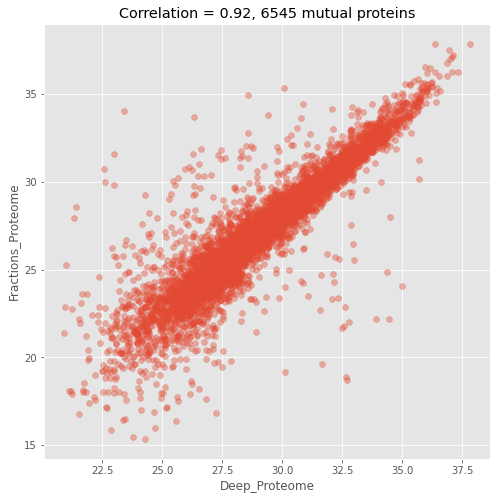

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(new['deep_median_intensity'], new['fractions_median_intensity'], alpha=0.4)
ax.set_xlabel('Deep_Proteome')
ax.set_ylabel('Fractions_Proteome')
ax.set_title("Correlation = 0.92, 6545 mutual proteins")
plt.savefig(root + 'Deep vs fractions correlation.pdf')

In [70]:
okay.to_csv(root + 'deep_proteome_quant.csv')

In [78]:
okay[okay['Gene names'].map(lambda x: 'HIST' in str(x))]

,Protein IDs,Majority protein IDs,Protein names,Gene names,Intensity HEK_1,Intensity HEK_2,Intensity HEK_3,deep_median_intensity
1725,Q93077;Q7L7L0;P04908;Q71UI9-5,Q93077;Q7L7L0;P04908,Histone H2A type 1-C;Histone H2A type 3;Histon...,HIST1H2AC;HIST3H2A;HIST1H2AB,24.790644,22.508526,23.055930,23.055930
1987,P10412;Q02539;P16401,P10412,Histone H1.4,HIST1H1E,29.864462,31.143335,29.684785,29.864462
2184,P16104;Q96QV6,P16104;Q96QV6,Histone H2AX;Histone H2A type 1-A,H2AFX;HIST1H2AA,35.676113,34.552018,34.551674,34.552018
2197,P16402,P16402,Histone H1.3,HIST1H1D,30.939507,30.598325,30.868942,30.868942
2198,P16403,P16403,Histone H1.2,HIST1H1C,35.510059,36.055609,34.730040,35.510059
2401,P22492,P22492,Histone H1t,HIST1H1T,24.701710,23.634448,23.866462,23.866462
3731,P62805,P62805,Histone H4,HIST1H4A,37.107001,36.599872,36.849104,36.849104
3732,P62807;Q93079;Q99877;P58876;O60814;Q5QNW6;Q998...,P62807;Q93079;Q99877;P58876;O60814;Q5QNW6;Q998...,Histone H2B type 1-C/E/F/G/I;Histone H2B type ...,HIST1H2BC;HIST1H2BH;HIST1H2BN;HIST1H2BD;HIST1H...,37.703999,37.595710,37.121065,37.595710
3799,P68431;Q16695;Q6NXT2,P68431;Q16695;Q6NXT2,Histone H3.1;Histone H3.1t;Histone H3.3C,HIST1H3A;HIST3H3;H3F3C,33.181289,30.066765,29.562000,30.066765
5133,Q6FI13;Q16777,Q6FI13;Q16777,Histone H2A type 2-A;Histone H2A type 2-C,HIST2H2AA3;HIST2H2AC,34.220074,34.259753,33.363719,34.220074
